<a href="https://colab.research.google.com/github/jul1andav1d/Project-2/blob/main/PROJECT_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT 2 PART 2

#Dataset #2

1) Source of data

2) Brief description of data

3) What is the target?

4) Is this a classification or regression problem?

5) How many features?

6) How many rows of data.

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

In [ ]:
    # 1)  

#Dataset information can be found here:
#https://archive.ics.uci.edu/ml/datasets/Adult



    # 2)

#This is a dataset containing information on Census from a 1994 Database. 


#Extraction was done by Barry Becker. and A set of reasonably clean records 
#was extracted using the following conditions: ((AAGE>16) && (AGI>100) && 
#(AFNLWGT>1)&& (HRSWK>0))


  # - Donor:

#         Ronny Kohavi and Barry Becker
#         Data Mining and Visualization
#         Silicon Graphics.
#         e-mail: ronnyk '@' live.com for questions.


    # 3)

# Income column

    # 4)

# Classification

    # 6)

    # There are 32,561 Rows, and 15 Columns)

In [ ]:
# 5) Will be answered as i work on cleaning my data.

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/PROJECT 2 - GITHUB/adult.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#- 7) 

- I already encountered some challenges and I can see I'll have to correct the name of my country as well becasue it's mispelled as 'COL U MBIA' but its 'COL O MBIA' WIHT AN O, also there are some values that are not empty but they have odd values, most likely will use simpleimputer for average 'mean' on numerical and 'mostfrequent' on categorical values So I can avoid dropping more information.

In [ ]:
#There are no NAME columns on the dataset
#I looked for a way to get them:

with open('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/PROJECT 2 - GITHUB/adult.names') as f:
    print(f.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [ ]:
#Getting columns in the dataframe:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [ ]:
#checking df:
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
import numpy as np

- Checking how many rows and columns

In [ ]:
df.shape

(32561, 15)

#THE DATASET CHOSEN WAS THE SECOND ONE.

- Using the approved dataset proposed for project 2 part 1 last week, clean and explore the data set.  

To meet the requirements for this week I must have:

- deleted unnecessary columns

- deleted duplicate rows

- identified and addressed missing values 

- identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

- produced univariate visuals for the target and all features

- identified outliers

- produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

- clearly commented all of your cleaning steps and described any decisions you made 

# Cleaning and Univariate EDA.

- Checking for missing values, duplicates and handling unnecessary information.

In [ ]:
df.isna().any().sum()

0

In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True) #Dropping duplicates

In [ ]:
#Double checking dataframe:
df.duplicated().any().sum()

0

- Dropping unnecessary information 

I am dropping, these columns because I don't see the use of unique values, 
or almost empty data, it wouldn't make sense to keep them.


In [ ]:
df.drop(columns=['fnlwgt', 'education-num', 'relationship', 'capital-gain', 'capital-loss'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   marital-status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   race            32537 non-null  object
 6   sex             32537 non-null  object
 7   hours-per-week  32537 non-null  int64 
 8   native-country  32537 non-null  object
 9   income          32537 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB


In [ ]:
df.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


- Checking the statuss of the numerical columns

In [ ]:
df.describe()

,age,hours-per-week
count,32537.000000,32537.000000
mean,38.585549,40.440329
std,13.637984,12.346889
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


- Identifying and correcting inconsistencies in categorical values:


In [ ]:
df.value_counts('native-country')


native-country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [ ]:
np.unique(df['workclass'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [ ]:
df.value_counts('occupation')  

occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
dtype: int64

#I noticed there is a value ' ?' in various columns. This will need more in depth analysis. And probably the need of a simpleimputer within the preprocessing pipeline.

In [ ]:
np.unique(df['native-country'])

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [ ]:
df.value_counts('workclass')  

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [ ]:
df.loc[df['native-country'] == ' ?', :]

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Asian-Pac-Islander,Male,40,?,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,White,Male,40,?,<=50K
93,30,Private,HS-grad,Married-civ-spouse,Sales,Asian-Pac-Islander,Female,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,Masters,Married-civ-spouse,Sales,White,Male,50,?,>50K
32469,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,White,Female,99,?,<=50K
32492,42,Self-emp-not-inc,HS-grad,Divorced,Sales,White,Male,50,?,<=50K
32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,White,Male,45,?,>50K


As of right now let's handle the incorrect spelling in 'ColUmbia' for 'ColOmbia', replacing the U with an O.

In [ ]:
colUmbia = df['native-country'] == ' Columbia'
df.loc[colUmbia, 'native-country'] = ' Colombia'
df.value_counts('native-country')

native-country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Colombia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

Importing Libraries

- Univariate visuals:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

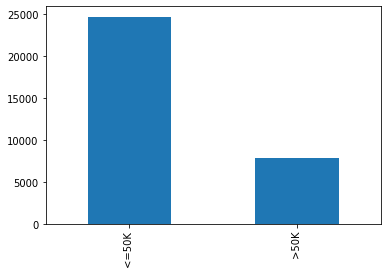

In [ ]:
df['income'].value_counts().plot(kind = 'bar'); 

There do not appear to be any inconsistecies in the categories.

- Lets check distributions of numerical values with histograms.

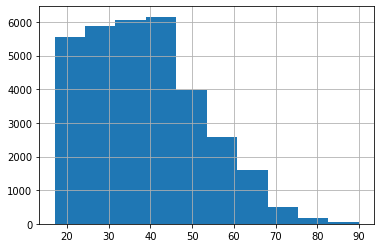

In [ ]:
df['age'].hist();

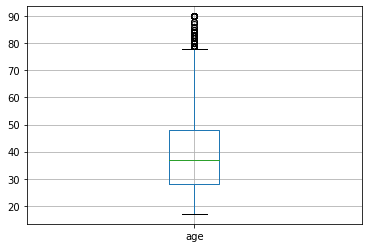

In [ ]:
df.boxplot(column = 'age')

There is a great presence of outliers for Age at the end of the distribution. but They're possible.
The age is is not greatly skewed, but it shows more repetitive values on the 20's to 40's.

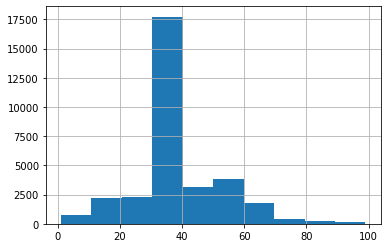

In [ ]:
df['hours-per-week'].hist();

- Heatmap and correlation between target and features

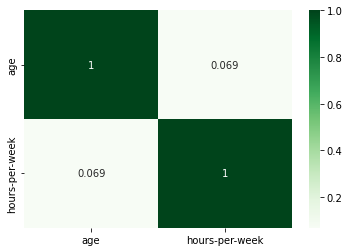

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap='Greens')